In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def sigmoid(x):
    s=1/(1+np.exp(-x))
    ds=s*(1-s)
    return s,ds

In [3]:
x=np.arange(-6,6,0.01)

In [4]:
sigmoid(x)

(array([0.00247262, 0.00249741, 0.00252245, ..., 0.99745227, 0.99747755,
        0.99750259]),
 array([0.00246651, 0.00249117, 0.00251608, ..., 0.00254124, 0.00251608,
        0.00249117]))

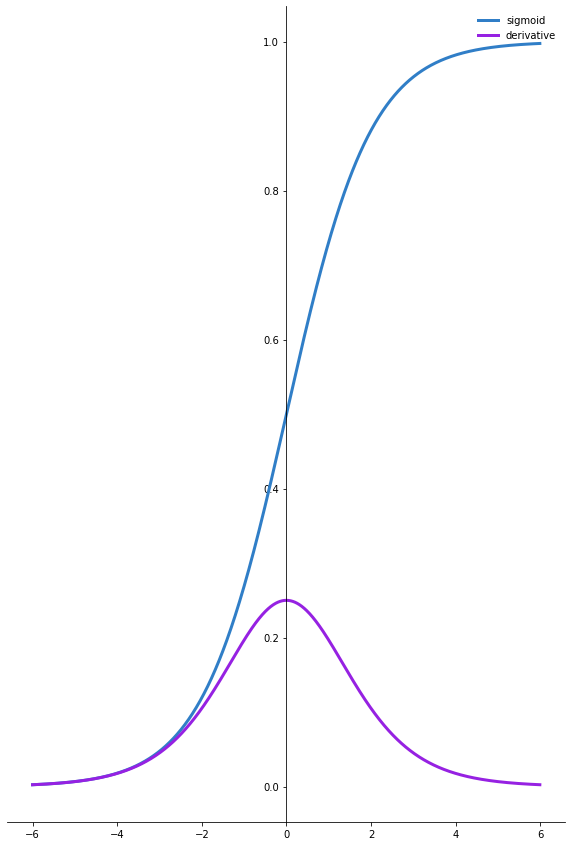

In [5]:
fig,ax=plt.subplots(figsize=(10,15))
ax.spines['left'].set_position('center')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')


ax.plot(x,sigmoid(x)[0],color='#307EC7',linewidth=3,label='sigmoid')

ax.plot(x,sigmoid(x)[1],color='#9621E2',linewidth=3,label='derivative')

ax.legend(loc='upper right',frameon=False)

In [6]:
def tanh(x):
    t=(np.exp(x)-np.exp(-x)/(np.exp(x)*np.exp(-x)))
    dt=1-t**2
    return t,dt

In [7]:
z=np.arange(-4,4,0.01)

In [8]:
tanh(z)[0].size

800

In [9]:
tanh(z)[1].size

800

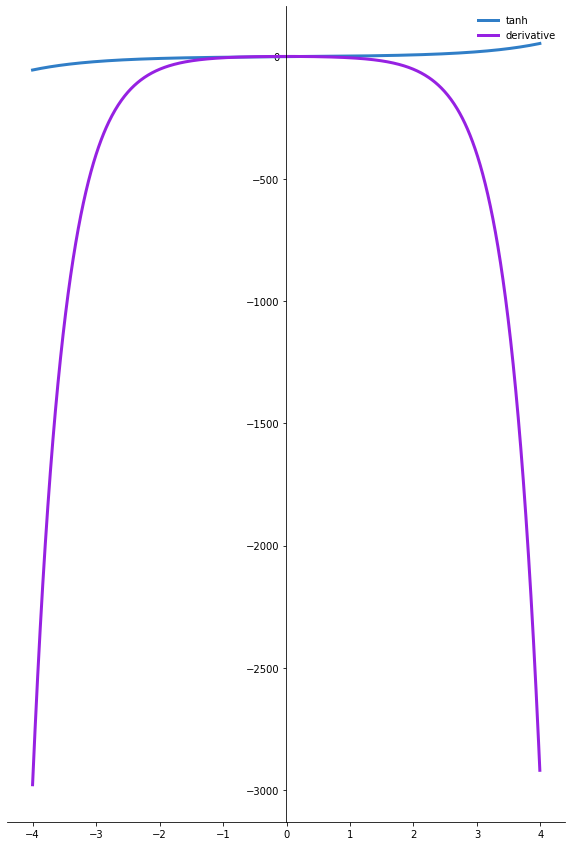

In [10]:
fig,ax=plt.subplots(figsize=(10,15))
ax.spines['left'].set_position('center')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')


ax.plot(z,tanh(z)[0],color='#307EC7',linewidth=3,label='tanh')

ax.plot(z,tanh(z)[1],color='#9621E2',linewidth=3,label='derivative')

ax.legend(loc='upper right',frameon=False)

#### Tensorflow and keras

In [1]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import SGD

In [2]:
import numpy as np

def sample_threeclass(n, ratio=0.8):
    np.random.seed(42)
    y_0 = np.random.randint(2, size=(n, 1))
    switch = (np.random.random(size=(n, 1)) <= ratio)
    y_1 = ~y_0 & switch
    y_2 = ~y_0 & ~switch
    y = np.concatenate([y_0, y_1, y_2], axis=1)
    
    X = y_0 + (np.random.normal(size=n) / 5)[np.newaxis].T
    return (X, y)


X_train, y_train = sample_threeclass(1000)
X_test, y_test = sample_threeclass(100)

### Linear
The simplest activation function is linear. A linear activation is simply a linear transform on the data. The input signals from the tensors that sink into the node are simply added up, and the result of that addition is packaged and sent downstream through the output tensor. A linear activator allows a node to learn linear relationships within the data. 

In [3]:
clf = Sequential()
clf.add(Dense(3, activation='linear', input_shape=(1,), name='hidden'))
clf.add(Dense(3, activation='softmax', name='out'))
clf.compile(loss='categorical_crossentropy', optimizer=SGD(), metrics=['accuracy'])

clf.fit(X_train, y_train, epochs=10, batch_size=16)


Epoch 1/10
63/63 [==============================] - 0s 639us/step - loss: 0.7187 - accuracy: 0.7580
Epoch 2/10
63/63 [==============================] - 0s 517us/step - loss: 0.6279 - accuracy: 0.8240
Epoch 3/10
63/63 [==============================] - 0s 858us/step - loss: 0.5607 - accuracy: 0.8590
Epoch 4/10
63/63 [==============================] - 0s 721us/step - loss: 0.5103 - accuracy: 0.8770
Epoch 5/10
63/63 [==============================] - 0s 580us/step - loss: 0.4718 - accuracy: 0.8820
Epoch 6/10
63/63 [==============================] - 0s 595us/step - loss: 0.4423 - accuracy: 0.8860
Epoch 7/10
63/63 [==============================] - 0s 731us/step - loss: 0.4195 - accuracy: 0.8900
Epoch 8/10
63/63 [==============================] - 0s 595us/step - loss: 0.4016 - accuracy: 0.8910
Epoch 9/10
63/63 [==============================] - 0s 568us/step - loss: 0.3874 - accuracy: 0.8920
Epoch 10/10
63/63 [==============================] - 0s 907us/step - loss: 0.3759 - accuracy: 0.8920

### Logistic (sigmoid)
Non-linear activation functions come in many shapes. The most general class of non-linear activation function is so-called sigmoid functions, which are distinguishable by having an S-shaped value curve.

The most well-known sigmoid function is the logistic function:

(-5.49, 5.290000000000008, -0.04256437797184291, 1.0410946577429678)

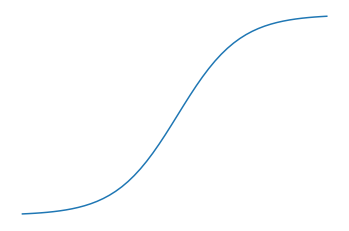

In [4]:
def logistic_func(x): return np.e**x/(np.e**x + 1)

import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(np.arange(-5, 5, 0.2), [logistic_func(x) for x in np.arange(-5, 5, 0.2)])
plt.axis('off')

In [5]:
clf = Sequential()
clf.add(Dense(3, activation='sigmoid', input_shape=(1,), name='hidden'))
clf.add(Dense(3, activation='softmax', name='out'))
clf.compile(loss='categorical_crossentropy', optimizer=SGD(), metrics=['accuracy'])

clf.fit(X_train, y_train, epochs=20, batch_size=16, verbose=0)

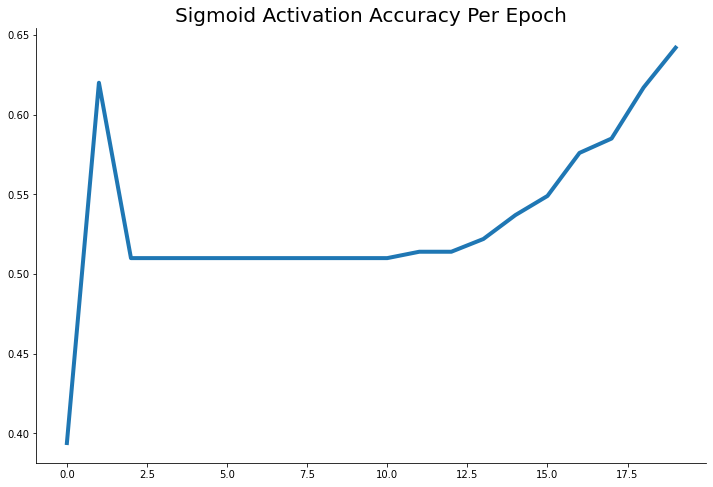

In [7]:
fig = plt.figure(figsize=(12, 8))
plt.plot(range(len(clf.history.history['accuracy'])), clf.history.history['accuracy'], linewidth=4)
import seaborn as sns; sns.despine()
plt.title("Sigmoid Activation Accuracy Per Epoch", fontsize=20)
pass


### Tanh
An alternative to the logistic function is arctan or "tanh". This curve has different properties:

(-5.49, 5.290000000000008, -1.099897892060763, 1.0998532394989282)

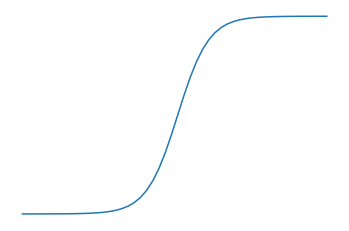

In [8]:
plt.plot(np.arange(-5, 5, 0.2), [np.tanh(x) for x in np.arange(-5, 5, 0.2)])
plt.axis('off')


In [9]:
clf = Sequential()
clf.add(Dense(3, activation='tanh', input_shape=(1,), name='hidden'))
clf.add(Dense(3, activation='softmax', name='out'))
clf.compile(loss='categorical_crossentropy', optimizer=SGD(), metrics=['accuracy'])

clf.fit(X_train, y_train, epochs=10, batch_size=16, verbose=0)

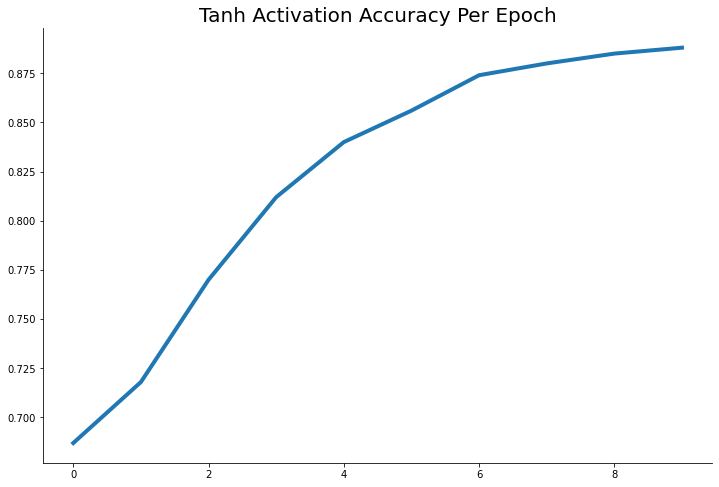

In [11]:
fig = plt.figure(figsize=(12, 8))
plt.plot(range(len(clf.history.history['accuracy'])), clf.history.history['accuracy'], linewidth=4)
import seaborn as sns; sns.despine()
plt.title("Tanh Activation Accuracy Per Epoch", fontsize=20)
pass

### Rectified linear (ReLU)
The rectified linear function is a piecewise function which staples together a flat and a linear activation function. It is non-linear, but very much not sigmoid

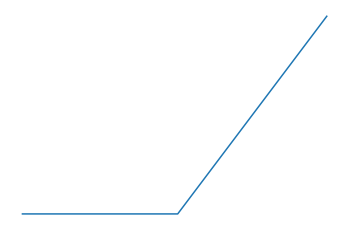

In [12]:
def relu(x):
    return 0 if x <= 0 else x

plt.plot(np.arange(-5, 5, 0.2), [relu(x) for x in np.arange(-5, 5, 0.2)])
plt.axis('off')
pass


In [13]:
clf = Sequential()
clf.add(Dense(3, activation='relu', input_shape=(1,), name='hidden'))
clf.add(Dense(3, activation='softmax', name='out'))
clf.compile(loss='categorical_crossentropy', optimizer=SGD(), metrics=['accuracy'])

clf.fit(X_train, y_train, epochs=10, batch_size=16, verbose=0)

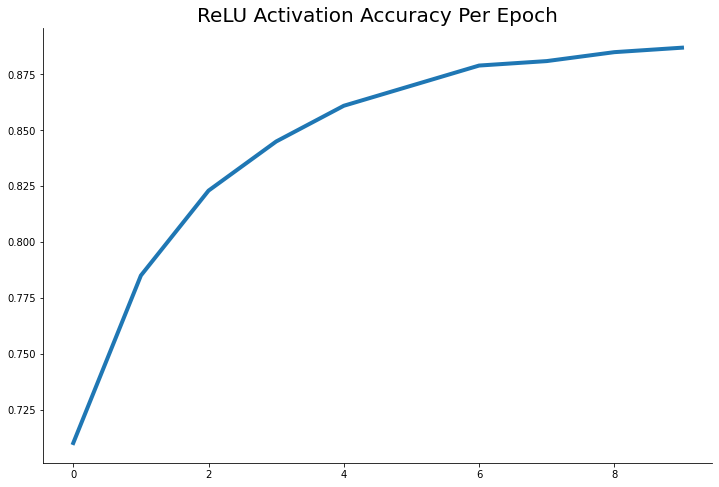

In [15]:
fig = plt.figure(figsize=(12, 8))
plt.plot(range(len(clf.history.history['accuracy'])), clf.history.history['accuracy'], linewidth=4)
import seaborn as sns; sns.despine()
plt.title("ReLU Activation Accuracy Per Epoch", fontsize=20)
pass


### Leaky ReLU
Leaky ReLU is an attempt at rectifying the dying ReLU problem by adapting the function shape. The shape is the same, but instead of using 0 on the negative part of the curve, the Leaky ReLU uses a very small positive value:

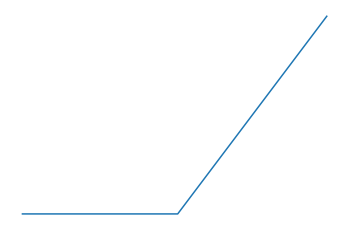

In [16]:
def leaky_relu(x):
    return 0.01 if x <= 0 else x

plt.plot(np.arange(-5, 5, 0.2), [relu(x) for x in np.arange(-5, 5, 0.2)])
plt.axis('off')
pass